# Sentiment Analysis on Movie Reviews
## Overview
This project demonstrates a complete machine learning pipeline for sentiment analysis on movie reviews. We will use the IMDb Movie Reviews dataset to classify reviews as either positive or negative. The process includes downloading and preprocessing the data, extracting features using TF-IDF, training a logistic regression model, and evaluating its performance. The notebook highlights key steps in natural language processing (NLP) and machine learning, showcasing data handling, model training, and visualization techniques. This project serves as a practical example for anyone interested in applying machine learning to text data and understanding sentiment analysis.

## Setup and Installation
First, we need to set up our environment and install the necessary libraries. We will use numpy, pandas, scikit-learn, nltk, matplotlib, and seaborn for this project.

In [4]:
%pip install numpy pandas scikit-learn nltk matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


## Data Collection and Preprocessing
### Download the Dataset
We will download the IMDb Movie Reviews dataset and extract it.

In [5]:
import urllib.request
import tarfile

url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
file_path = "aclImdb_v1.tar.gz"

def download_and_extract(url, file_path):
    urllib.request.urlretrieve(url, file_path)
    with tarfile.open(file_path, "r:gz") as tar:
        tar.extractall()

download_and_extract(url, file_path)

### Load and Preprocess the Data

In [6]:
import os
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download NLTK data
import nltk
nltk.download('stopwords')
nltk.download('punkt')

def load_data(data_dir):
    data = {'review': [], 'sentiment': []}
    for sentiment in ['pos', 'neg']:
        path = os.path.join(data_dir, sentiment)
        for file_name in os.listdir(path):
            with open(os.path.join(path, file_name), 'r', encoding='utf-8') as file:
                data['review'].append(file.read())
                data['sentiment'].append(1 if sentiment == 'pos' else 0)
    return pd.DataFrame(data)

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

data_dir = './aclImdb/train'
df = load_data(data_dir)
df['cleaned_review'] = df['review'].apply(preprocess_text)
df.to_csv('preprocessed_data.csv', index=False)
df.head()

[nltk_data] Downloading package stopwords to /home/nirn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/nirn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,review,sentiment,cleaned_review
0,"An American in Paris was, in many ways, the ul...",1,american paris many ways ultimate mixture art ...
1,All I can say about the Necromaniac/Schizophre...,1,say necromaniacschizophreniac 2 series even re...
2,John Carpenter's Halloween<br /><br />Is it th...,1,john carpenters halloweenbr br greatest horror...
3,There really isn't much to say about this movi...,1,really isnt much say movieits crude funbr br p...
4,In the immediate aftermath following World War...,1,immediate aftermath following world war ii sou...


## Model Training
### Feature Extraction
We will use TF-IDF to convert text data into numerical form.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

data = pd.read_csv('preprocessed_data.csv')
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_review'], data['sentiment'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


### Train the Model
We will train a logistic regression model on the TF-IDF features.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

with open('sentiment_model.pkl', 'wb') as f:
    pickle.dump(model, f)

Accuracy: 0.8866
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      2485
           1       0.88      0.90      0.89      2515

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000

[[2162  323]
 [ 244 2271]]


##  Model Evaluation and Visualization
### Evaluate the Model
We will evaluate the model using a confusion matrix and other metrics. Visualizing the results helps us understand the model's performance better.

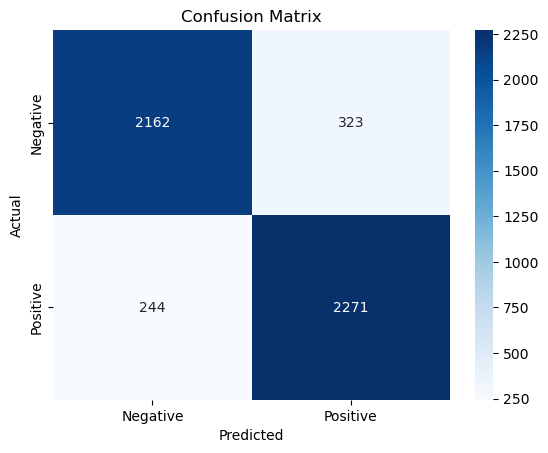

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred)
